In [ ]:
%pip install pandas matplotlib seaborn sklearn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
# Load datasets with true labels and predictions
test_df_svm = pd.read_csv("svm/test_with_ground_truth.csv")  # Replace with your labeled test dataset
test_df_iso = pd.read_csv("isolation-forest/test_with_ground_truth.csv")  # Replace with your labeled test dataset

# Prepare ground truth and predictions
y_true_svm = test_df_svm['true_label']
y_true_iso = test_df_iso['true_label']

# Isolation Forest predictions
y_pred_iso = test_df_svm['is_anomalous'].apply(lambda x: -1 if x else 1)

# One-Class SVM predictions
y_pred_svm = test_df_svm['is_anomalous_svm'].apply(lambda x: -1 if x else 1)

In [4]:
# --- Function to Plot Confusion Matrix ---
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
  cm = confusion_matrix(y_true, y_pred, labels=[1, -1])
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Normal', 'Anomalous'], yticklabels=['Normal', 'Anomalous'])
  plt.title(title)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

### Isolation Forest Evaluation ###
              precision    recall  f1-score   support

      Normal       1.00      0.31      0.48      2397
   Anomalous       0.94      1.00      0.97     24227

    accuracy                           0.94     26624
   macro avg       0.97      0.66      0.72     26624
weighted avg       0.94      0.94      0.92     26624

Accuracy: 0.9380634014423077


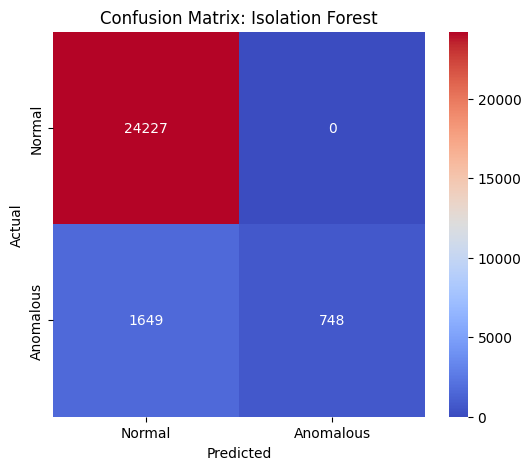

### One-Class SVM Evaluation ###
              precision    recall  f1-score   support

      Normal       0.80      0.47      0.59      2397
   Anomalous       0.95      0.99      0.97     24227

    accuracy                           0.94     26624
   macro avg       0.88      0.73      0.78     26624
weighted avg       0.94      0.94      0.93     26624

Accuracy: 0.9418569711538461


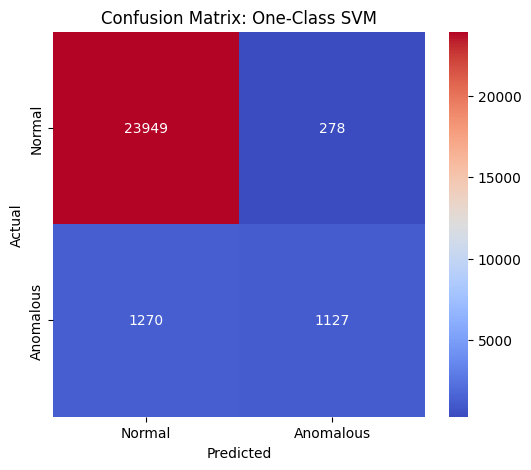

In [5]:
# --- Evaluate Isolation Forest ---
print("### Isolation Forest Evaluation ###")
print(classification_report(y_true_iso, y_pred_iso, target_names=['Normal', 'Anomalous']))
print("Accuracy:", accuracy_score(y_true_iso, y_pred_iso))

# Plot Confusion Matrix for Isolation Forest
plot_confusion_matrix(y_true_iso, y_pred_iso, title="Confusion Matrix: Isolation Forest")

# --- Evaluate One-Class SVM ---
print("### One-Class SVM Evaluation ###")
print(classification_report(y_true_svm, y_pred_svm, target_names=['Normal', 'Anomalous']))
print("Accuracy:", accuracy_score(y_true_svm, y_pred_svm))

# Plot Confusion Matrix for One-Class SVM
plot_confusion_matrix(y_true_svm, y_pred_svm, title="Confusion Matrix: One-Class SVM")